# Example application of tool

Let's apply the tool to a set of variants from a cancer cell line.

Dataset is from [Talsania et. al. 2022](https://genomebiology.biomedcentral.com/articles/10.1186/s13059-022-02816-6). These are structural variants called using the [Manta pipeline](https://github.com/Illumina/manta) on WGS data from Illumina in HCC1395 tumor cells.

In [1]:
import pandas as pd
import numpy as np 
import os
from pathlib import Path

# Get input variants

In [2]:
# Get variants

ftp_path = 'https://ftp-trace.ncbi.nlm.nih.gov/ReferenceSamples/seqc/Somatic_Mutation_WG/analysis/SVs/VCFs/tumor.illumina.manta.EA_T_1.vcf.gz'
data_file = 'test_data/example_application/'
in_file = f'{data_file}tumor.illumina.manta.EA_T_1.vcf'

if not Path(f'../{in_file}').is_file():
    os.system(f'wget -P ../test/ {ftp_path}')
    os.system(f'gupzip ../{in_file}.gz')


In [3]:
# Read input

import sys
sys.path.insert(0, '../scripts')

import reading_utils
reading_utils.var_set_size = 2000

variants = reading_utils.read_input(f'../{in_file}', 0)
variants

CHROM       POS      END  \
0                        chr1   1117831      NaN   
1                        chr1   1119512      NaN   
2                        chr1   3721048  3734333   
3                        chr1   6742482      NaN   
4                        chr1   9357666  9377061   
...                       ...       ...      ...   
1543                     chrY  14531089      NaN   
1544                     chrY  14533586      NaN   
1545  chr16_KI270728v1_random   1769992      NaN   
1546  chr17_KI270729v1_random    162446   162616   
1547         chrUn_KI270591v1       537      878   

                                                    REF  \
0                                                     C   
1                                                     A   
2                                                     T   
3                                                     C   
4                                                     G   
...                                                 ...   
1543                                                  T   
1544                                                  A   
1545                                                  A   
1546  GAGTCCATTCGATGATTTCATTAGATTCCATTGGAAGATGATTCCA...   
1547  CTGTTTCCATACTGCTCAAGAAAATAAAGGTTCAACTTTGTGGGAT...   

                          ALT SVTYPE   SVLEN  
0           [chr22:20272153[C    BND     NaN  
1     ACAGTGC]chr22:20302979]    BND     NaN  
2                <DUP:TANDEM>    DUP   13285  
3           C[chr12:96100887[    BND     NaN  
4                       <DEL>    DEL  -19395  
...                       ...    ...     ...  
1543          T[chrX:6219006[    BND     NaN  
1544          A]chrX:6219008]    BND     NaN  
1545        A[chr9:129442980[    BND     NaN  
1546                        G    DEL    -170  
1547                        C    DEL    -341  

[1548 rows x 7 columns]

In [4]:
# Look at varinat types present
variants.SVTYPE.value_counts()

BND    622
DEL    552
DUP    294
INS     80
Name: SVTYPE, dtype: int64

# Score variants using tool

In [5]:
# Get run command

file = 'tumor'#'CTCF_del' # Output files prefix
directory = f'{data_file}tumor_output'# '../test/output' # Output directory

print('Run this command in the main directory:\n')
print('python scripts/SuPreMo.py', in_file,
      '--file', file, # File name prefix for outputs
      '--dir', directory, # Path to save output in 
      '--augment', # Get the average augmented scores
      '--get_Akita_scores') # Get disruption scores


Run this command in the main directory:

python scripts/SuPreMo.py test_data/example_application/tumor.illumina.manta.EA_T_1.vcf --file tumor --dir test_data/example_application/tumor_output --augment --get_Akita_scores


In [6]:
# Get path to output files
out_file = os.path.join(directory, file)

## Get and plot scores 

In [23]:
# Read scores output

scores = pd.read_csv(f'../{out_file}_scores', sep = '\t')
scores.iloc[:10,:10]

var_index  mse_mean  corr_mean
0          0  0.006174   0.980387
1          1  0.008415   0.928854
2          2  0.024681   0.955341
3          3  0.002878   0.973517
4          4  0.015164   0.973157
5          5       NaN        NaN
6          6  0.005068   0.933428
7          7  0.009095   0.964207
8          8  0.012784   0.964684
9          9  0.006267   0.884198

In [24]:
# Add scores dataframe to input dataframe to match them with information about the perturbations

scores = pd.concat([variants, scores], axis = 1)
scores.iloc[:10,:10]

CHROM       POS       END  \
0  chr1   1117831       NaN   
1  chr1   1119512       NaN   
2  chr1   3721048   3734333   
3  chr1   6742482       NaN   
4  chr1   9357666   9377061   
5  chr1   9495567  36665592   
6  chr1  13349505       NaN   
7  chr1  13931876  13932299   
8  chr1  17393975  17394067   
9  chr1  18359587       NaN   

                                                 REF                      ALT  \
0                                                  C        [chr22:20272153[C   
1                                                  A  ACAGTGC]chr22:20302979]   
2                                                  T             <DUP:TANDEM>   
3                                                  C        C[chr12:96100887[   
4                                                  G                    <DEL>   
5                                                  T             <DUP:TANDEM>   
6                                                  A        A]chr8:101508951]   
7  TGCCCAGGCTGGAGTGCAGTGGCACGATCTTGGCTCACTGCAACCT...                        T   
8  GATGAGATGGCCTTCTGCTACACCCAGGCTCCCCACAAGACAACGT...                        G   
9                                                  A        A]chr6:163603712]   

  SVTYPE     SVLEN  var_index  mse_mean  corr_mean  
0    BND       NaN          0  0.006174   0.980387  
1    BND       NaN          1  0.008415   0.928854  
2    DUP     13285          2  0.024681   0.955341  
3    BND       NaN          3  0.002878   0.973517  
4    DEL    -19395          4  0.015164   0.973157  
5    DUP  27170025          5       NaN        NaN  
6    BND       NaN          6  0.005068   0.933428  
7    DEL      -423          7  0.009095   0.964207  
8    DEL       -92          8  0.012784   0.964684  
9    BND       NaN          9  0.006267   0.884198

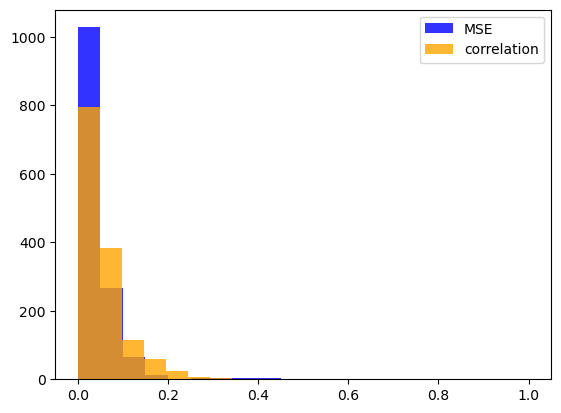

In [25]:
# Plot the disrtribution of disruption scores

from cooltools.lib.plotting import *
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import normalize
import math

norm_scores = {}
for method in ['mse', 'corr']:
    norm_scores[method] = normalize([scores.loc[~np.isnan(scores[f'{method}_mean']),
                                                f'{method}_mean']], 
                                    norm='max')[0]
    
def get_n_bins(data, bin_size):
    return math.ceil((max(data) - min(data)) / bin_size)


plt.hist(norm_scores['mse'], color = 'blue', alpha = 0.8, label = 'MSE',
         bins = get_n_bins(norm_scores['mse'], 0.05))
plt.hist(1 - norm_scores['corr'], color = 'orange', alpha = 0.8,  label = 'correlation',
         bins = get_n_bins(norm_scores['corr'], 0.05))
plt.legend(loc="upper right")
plt.show()

In [26]:
# Plotting help

def get_n_bins(data, bin_size):
    return math.ceil((max(data) - min(data)) / bin_size)

alpha = 0.5
colors = {'DEL':'blue',
          'DUP':'red',
          'BND':'green',
          'INS':'pink'}
top_n = 2

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


BND 0.0321666726894115
DEL 0.0960887347565359
DUP 0.0948755321562838
INS 0.0220109722913781


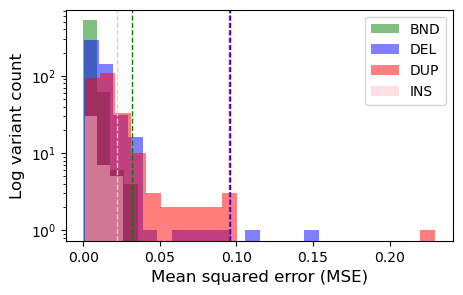

In [27]:
# Plot disruption scores by variant type

method = 'mse_mean'
data = scores[~np.isnan(scores[method])]

plt.figure(figsize=(5,3))

for SVTYPE in np.unique(scores.SVTYPE):
    plt.hist(data.loc[data.SVTYPE == SVTYPE, method], color = colors[SVTYPE], alpha = alpha, label = SVTYPE,
             bins = get_n_bins(data.loc[data.SVTYPE == SVTYPE, method], 0.01))
    plt.axvline(x = data.loc[data.SVTYPE == SVTYPE, method].sort_values(ascending = False).iloc[top_n], 
                color = colors[SVTYPE], linestyle = 'dashed', linewidth = 1)
    print(SVTYPE, data.loc[data.SVTYPE == SVTYPE, method].sort_values(ascending = False).iloc[top_n])
plt.yscale('log')
plt.legend(loc = 'upper right', fontsize = 10)
plt.xlabel('Mean squared error (MSE)', fontname = 'Helvetica', size = 12)
plt.ylabel('Log variant count', fontname = 'Helvetica', size = 12)
plt.show()

BND 0.28907713195622353
DEL 0.37722786212994797
DUP 0.2660918675919858
INS 0.1265577212590825


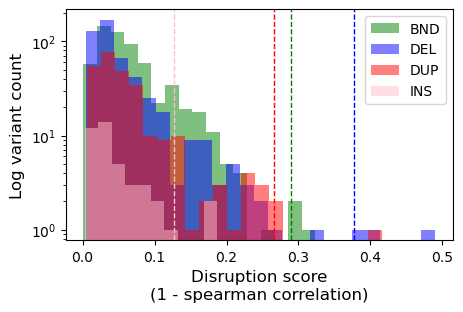

In [29]:
# Plot disruption scores by variant type

method = 'corr_mean'
data = scores[~np.isnan(scores[method])]

plt.figure(figsize=(5,3))

for SVTYPE in np.unique(scores.SVTYPE):
    plt.hist(1 - data.loc[data.SVTYPE == SVTYPE, method], color = colors[SVTYPE], alpha = alpha, label = SVTYPE,
             bins = get_n_bins(data.loc[data.SVTYPE == SVTYPE, method], 0.02))
    plt.axvline(x = 1 - data.loc[data.SVTYPE == SVTYPE, method].sort_values().iloc[top_n], 
                color = colors[SVTYPE], linestyle = 'dashed', linewidth = 1)
    print(SVTYPE, 1 - data.loc[data.SVTYPE == SVTYPE, method].sort_values().iloc[top_n])
plt.yscale('log')
plt.legend(loc = 'upper right', fontsize = 10)
plt.xlabel('Disruption score\n(1 - spearman correlation)', name = 'Helvetica', size = 12)
plt.ylabel('Log variant count', name = 'Helvetica', size = 12)
plt.show()

Looks like deletions and duplications are the most disruptive

# Prioritize most disruptive variants

In [13]:
# Get top 3 most disruptive variants 

top_variants = []

for method in ['mse_mean', 'corr_mean']:
    
    for SVTYPE in [x for x in scores.SVTYPE.unique() if x is not np.nan]:

        top_var = list(scores[(scores.SVTYPE == SVTYPE) & (~np.isnan(scores[method]))]
                            .sort_values(method, ascending = False)
                            .head(3)
                            .index
                            .values)

        for var in top_var:
            top_variants.append(var)
        
top_variants[:10]

[932, 1311, 1011, 829, 64, 549, 25, 894, 1355, 439]

In [14]:
variants_top = variants[[x in top_variants for x in variants.index]]

in_file_top = f'{data_file}tumor.illumina.manta.EA_T_1_top.txt'
variants_top['var_index'] = variants_top.index

# variants_top.to_csv(f'../{in_file_top}', sep = '\t', index = False)

/pollard/home/ketringjoni/miniconda3/envs/CBTN_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [16]:
scores.loc[27]

CHROM                  chr1
POS                69606524
END                     NaN
REF                       A
ALT          A[chr20:72846[
SVTYPE                  BND
SVLEN                   NaN
var_index                27
mse_mean           0.000722
corr_mean          0.998407
Name: 27, dtype: object

# Get maps for top scoring variants using tool

In [5]:
in_file_top = f'{data_file}tumor.illumina.manta.EA_T_1_top.txt'

variants_top = pd.read_csv(f'../{in_file_top}', sep = '\t')
variants_top[:10]

CHROM        POS          END  \
0  chr1   58064887   58560456.0   
1  chr1   69606524          NaN   
2  chr1  149799777  150031617.0   
3  chr6    1233843    1233907.0   
4  chr6    1233870    1233870.0   
5  chr6    4259990    4260069.0   
6  chr6   17874942   17874942.0   
7  chr6   23978115   23978115.0   
8  chr6   72060264   72637247.0   
9  chr6  168695904  168696064.0   

                                                 REF  \
0                                                  T   
1                                                  A   
2                                                  G   
3                                                  A   
4                                                  A   
5                                                  A   
6                                                  T   
7                                                  G   
8                                                  C   
9  GCCATTCAGATCATATTTCATGGAGGCCAGGTGTGCTGTGGAATGT...   

                                                 ALT SVTYPE     SVLEN  \
0                                              <DEL>    DEL -495569.0   
1                                     A[chr20:72846[    BND       NaN   
2                                       <DUP:TANDEM>    DUP  231840.0   
3                                       <DUP:TANDEM>    DUP      64.0   
4  AGAGGAGGCTGTCGGGGGACCGGGAGGACCTCGCCTGCTGTCCATG...    INS      64.0   
5                                       <DUP:TANDEM>    DUP      79.0   
6  TAATTCATTCCTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTGAG...    INS     323.0   
7  GAAAAATGACAACCAGGCCGGGTGCGGTGGCTCACGCCTGTAATCC...    INS     323.0   
8                                       <DUP:TANDEM>    DUP  576983.0   
9                                                  G    DEL    -160.0   

   var_index  
0         25  
1         27  
2         64  
3        397  
4        398  
5        403  
6        421  
7        439  
8        549  
9        607

In [6]:
# Get run command

file_top = 'tumor_top'# Output files prefix
directory_top = f'{data_file}tumor_output'# Output directory

print('Run this command in the main directory:\n')
print('python scripts/SuPreMo.py', in_file_top,
      '--file', file_top, # File name prefix for outputs
      '--dir', directory_top, # Path to save output in 
      '--augment', # Get the average augmented scores
      '--get_Akita_scores', # Get disruption scores
      '--get_maps', # Get predicted contact frequency maps
      '--get_tracks') # Get disruption tracks


Run this command in the main directory:

python scripts/SuPreMo.py test_data/example_application/tumor.illumina.manta.EA_T_1_top.txt --file tumor_top --dir test_data/example_application/tumor_output --augment --get_Akita_scores --get_maps --get_tracks


In [14]:
# Get path to output files
out_file_top = os.path.join(directory_top, file_top)

## Plot maps for top scoring variants

In [15]:
import sys
sys.path.insert(0, '../scripts')

import math
import plotting_utils

In [16]:
# Read in maps and disruption tracks
maps = np.load(f'../{out_file_top}_maps.npy', allow_pickle="TRUE").item()
tracks = np.load(f'../{out_file_top}_tracks.npy', allow_pickle="TRUE").item()

In [10]:
list(maps.keys())[:10]

['0_-1',
 '0_0',
 '0_0_revcomp',
 '0_1',
 '2_-1',
 '2_0',
 '2_0_revcomp',
 '2_1',
 '3_-1',
 '3_0']

In [11]:
list(tracks.keys())[:10]

['0_mse_track_-1',
 '0_corr_track_-1',
 '0_mse_track_0',
 '0_corr_track_0',
 '0_mse_track_0_revcomp',
 '0_corr_track_0_revcomp',
 '0_mse_track_1',
 '0_corr_track_1',
 '2_mse_track_-1',
 '2_corr_track_-1']

In [17]:
# Read scores output

scores_top = pd.read_csv(f'../{out_file_top}_scores', sep = '\t').drop('var_index', axis = 1)
scores_top = pd.concat([variants_top, scores_top], axis = 1)
scores_top.iloc[:10,:10]

CHROM        POS          END  \
0  chr1   58064887   58560456.0   
1  chr1   69606524          NaN   
2  chr1  149799777  150031617.0   
3  chr6    1233843    1233907.0   
4  chr6    1233870    1233870.0   
5  chr6    4259990    4260069.0   
6  chr6   17874942   17874942.0   
7  chr6   23978115   23978115.0   
8  chr6   72060264   72637247.0   
9  chr6  168695904  168696064.0   

                                                 REF  \
0                                                  T   
1                                                  A   
2                                                  G   
3                                                  A   
4                                                  A   
5                                                  A   
6                                                  T   
7                                                  G   
8                                                  C   
9  GCCATTCAGATCATATTTCATGGAGGCCAGGTGTGCTGTGGAATGT...   

                                                 ALT SVTYPE     SVLEN  \
0                                              <DEL>    DEL -495569.0   
1                                     A[chr20:72846[    BND       NaN   
2                                       <DUP:TANDEM>    DUP  231840.0   
3                                       <DUP:TANDEM>    DUP      64.0   
4  AGAGGAGGCTGTCGGGGGACCGGGAGGACCTCGCCTGCTGTCCATG...    INS      64.0   
5                                       <DUP:TANDEM>    DUP      79.0   
6  TAATTCATTCCTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTGAG...    INS     323.0   
7  GAAAAATGACAACCAGGCCGGGTGCGGTGGCTCACGCCTGTAATCC...    INS     323.0   
8                                       <DUP:TANDEM>    DUP  576983.0   
9                                                  G    DEL    -160.0   

   var_index  mse_mean  corr_mean  
0         25  0.153837   0.857328  
1         27       NaN        NaN  
2         64  0.095290   0.723767  
3        397  0.002974   0.993860  
4        398  0.001753   0.995992  
5        403  0.002412   0.993777  
6        421  0.025725   0.919802  
7        439  0.025957   0.928761  
8        549  0.094876   0.801610  
9        607  0.002737   0.993897

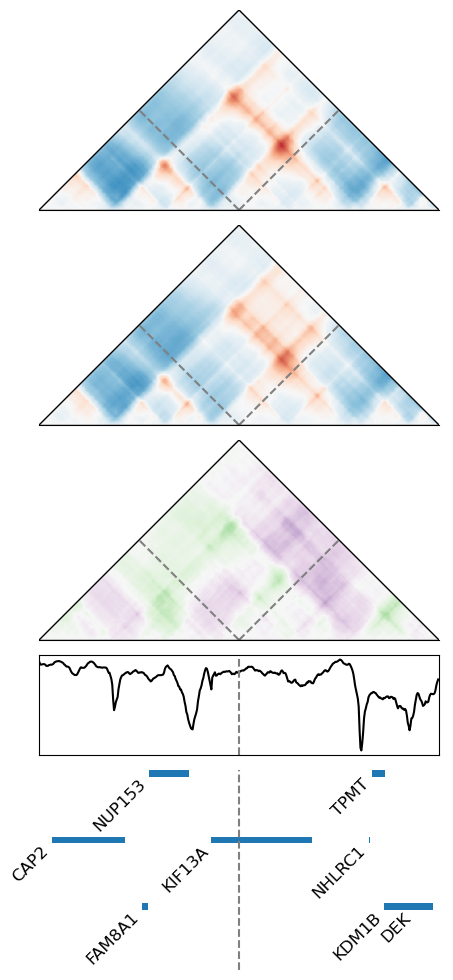

In [47]:
plotting_utils.plot_maps_genes_tracks(maps_i, genes_in_map, lines, disruption_track, gene_rows = gene_rows)


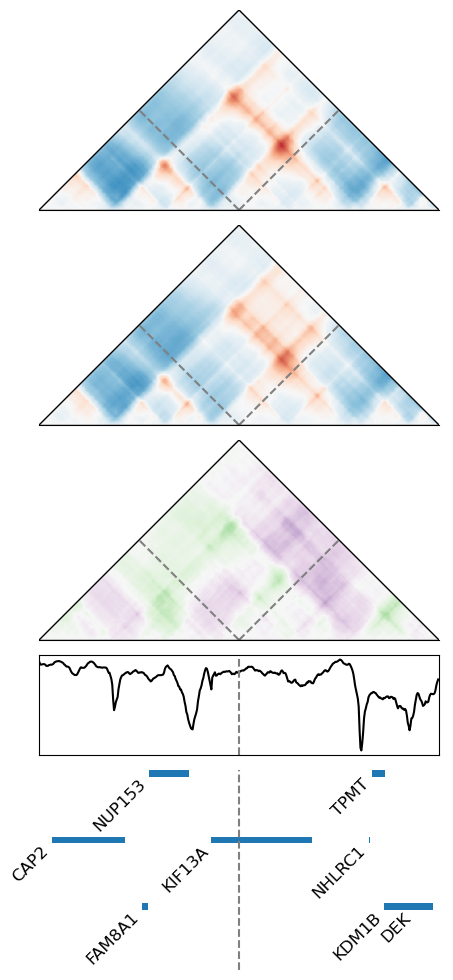

In [45]:
plotting_utils.plot_maps_genes_tracks([REF_map, maps_i[1]], genes_in_map, lines, disruption_track, gene_rows = gene_rows)

25 DEL


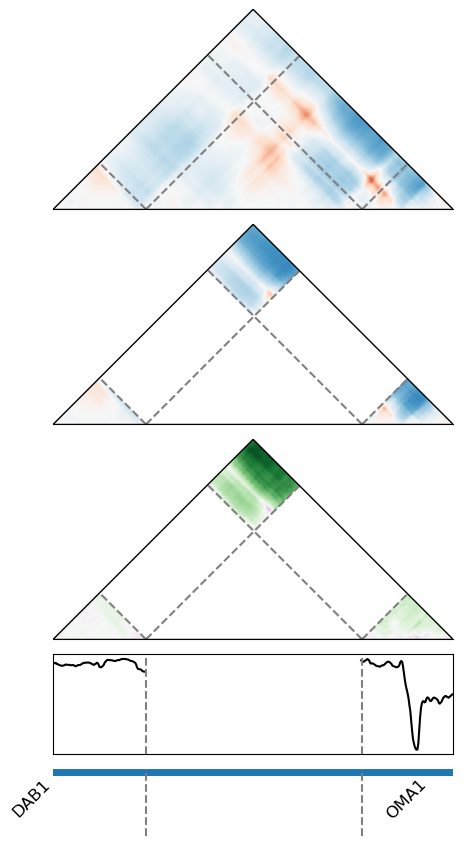

64 DUP


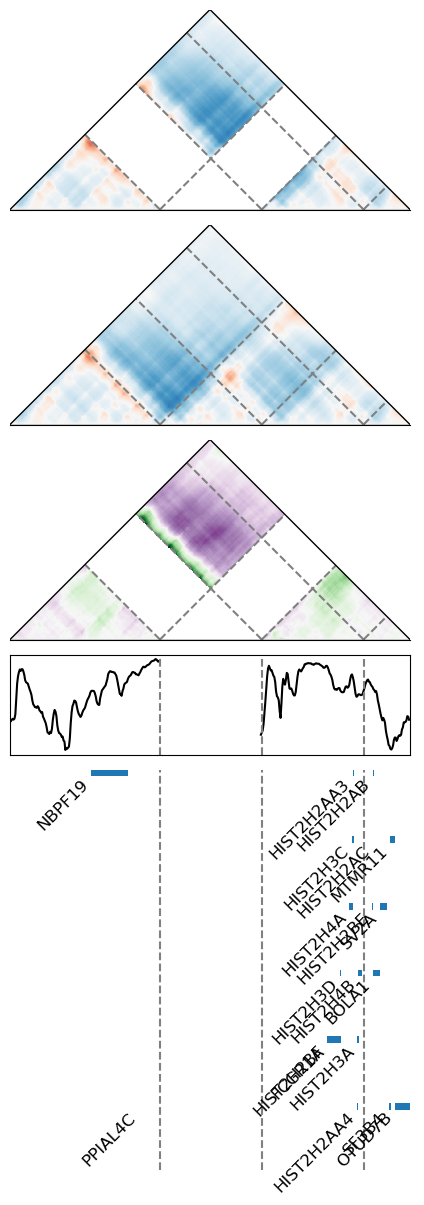

397 DUP


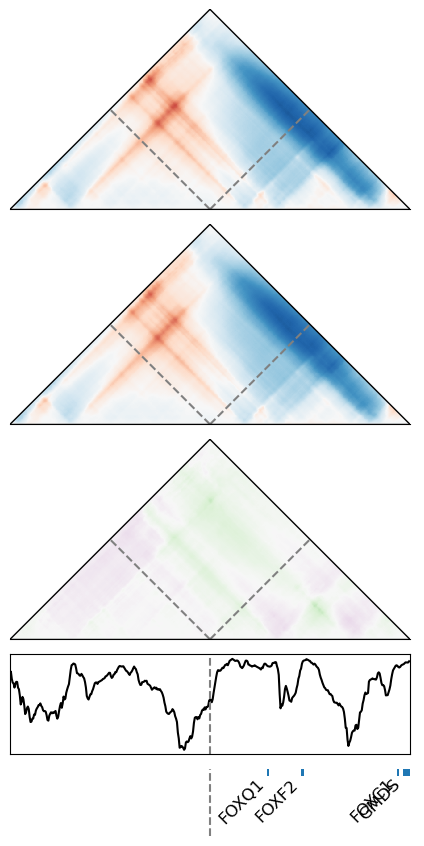

398 INS


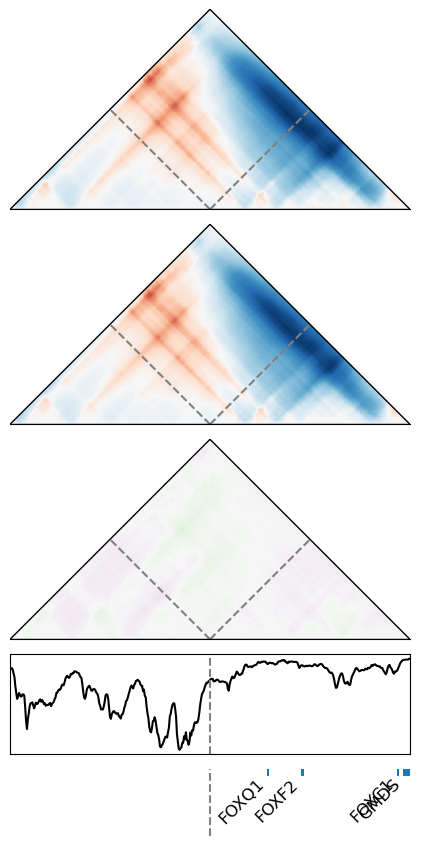

403 DUP


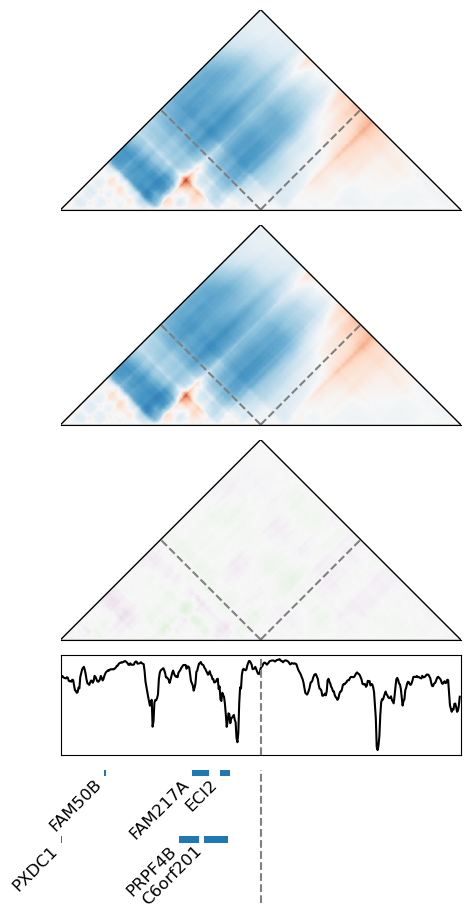

421 INS


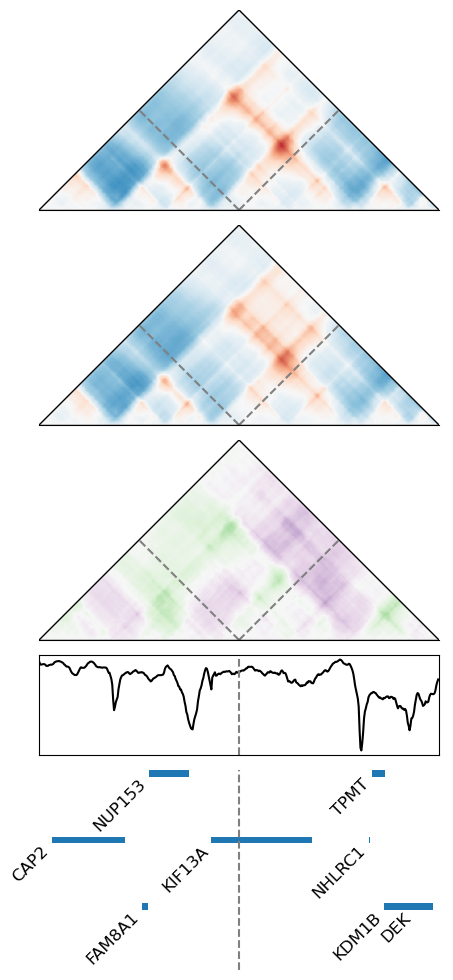

439 INS


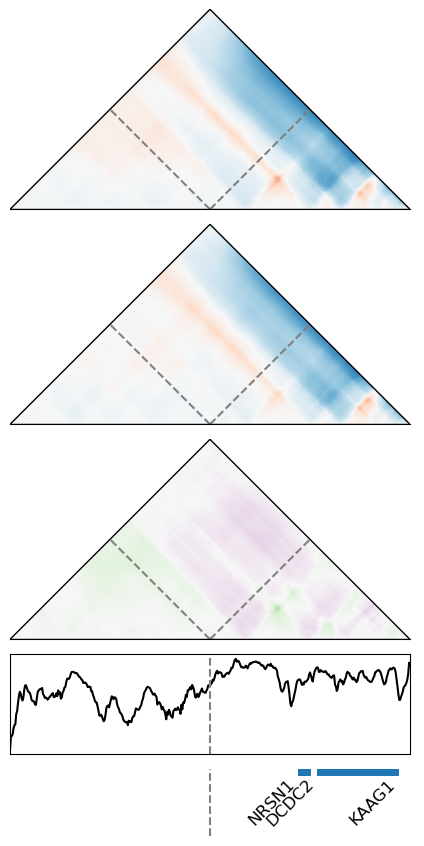

549 DUP


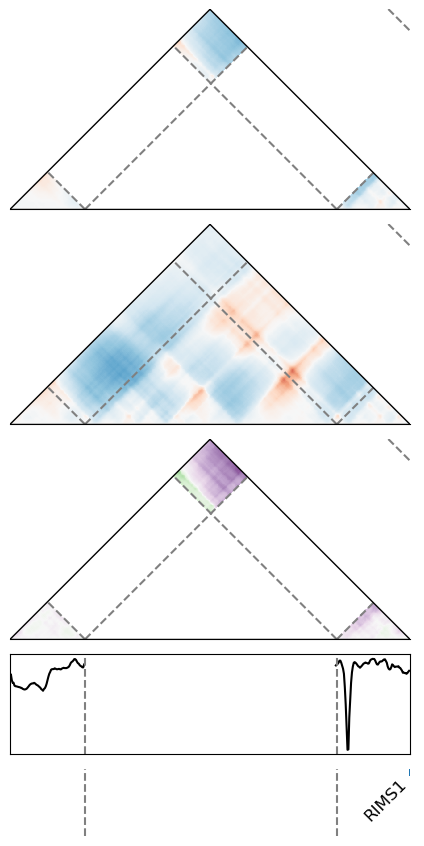

607 DEL


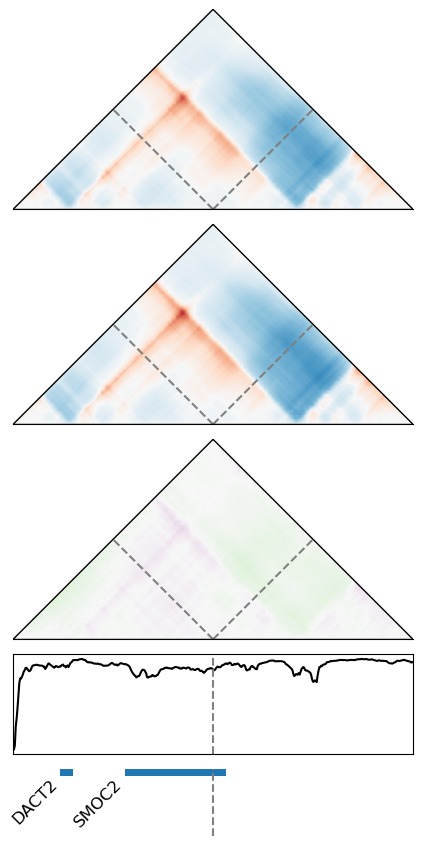

698 BND


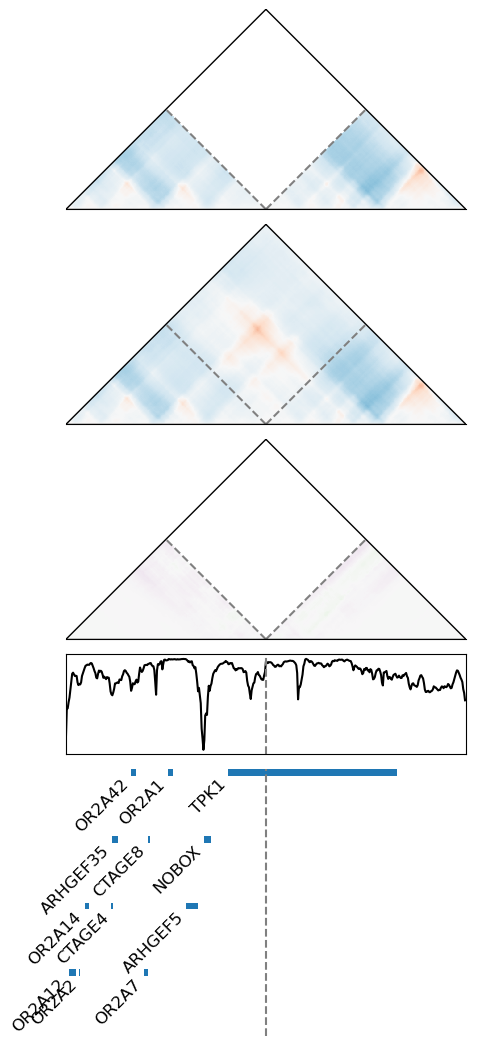

829 DUP


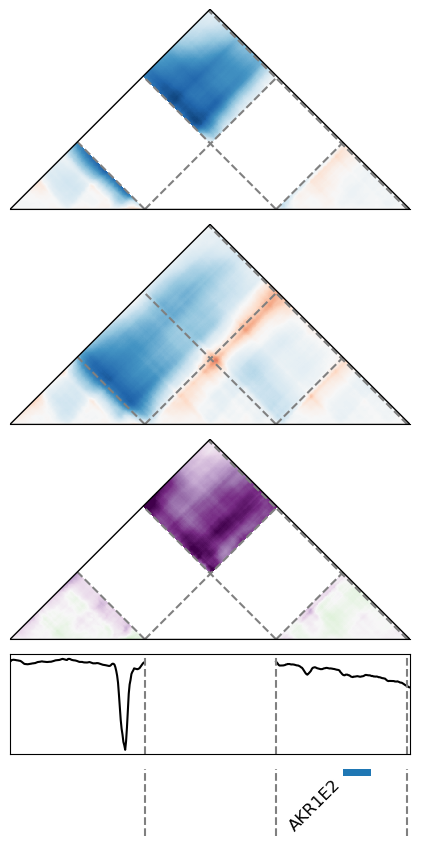

894 DEL


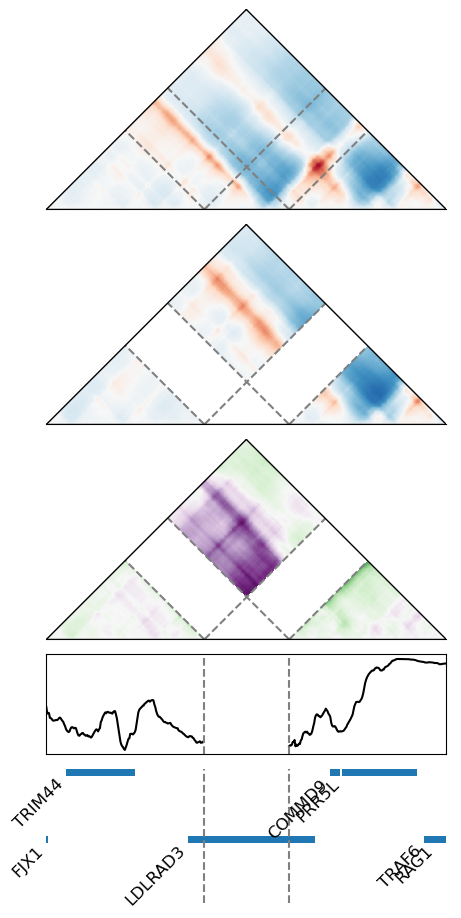

927 DEL


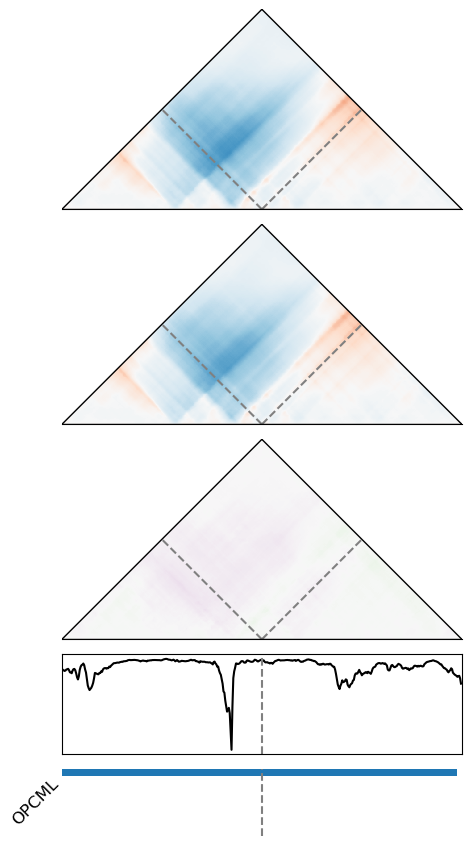

932 BND


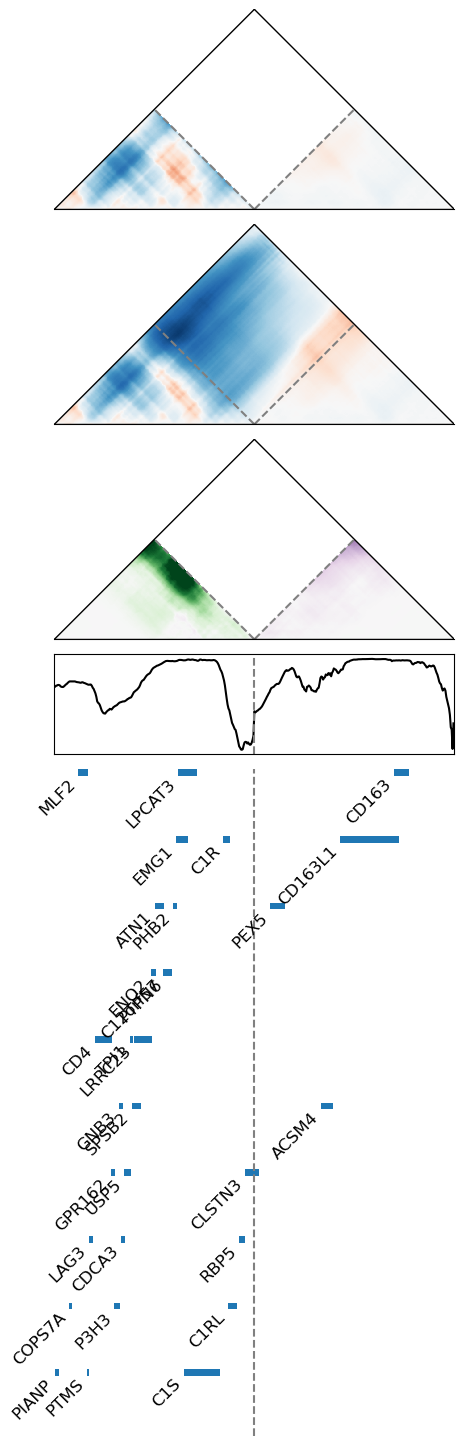

1011 BND


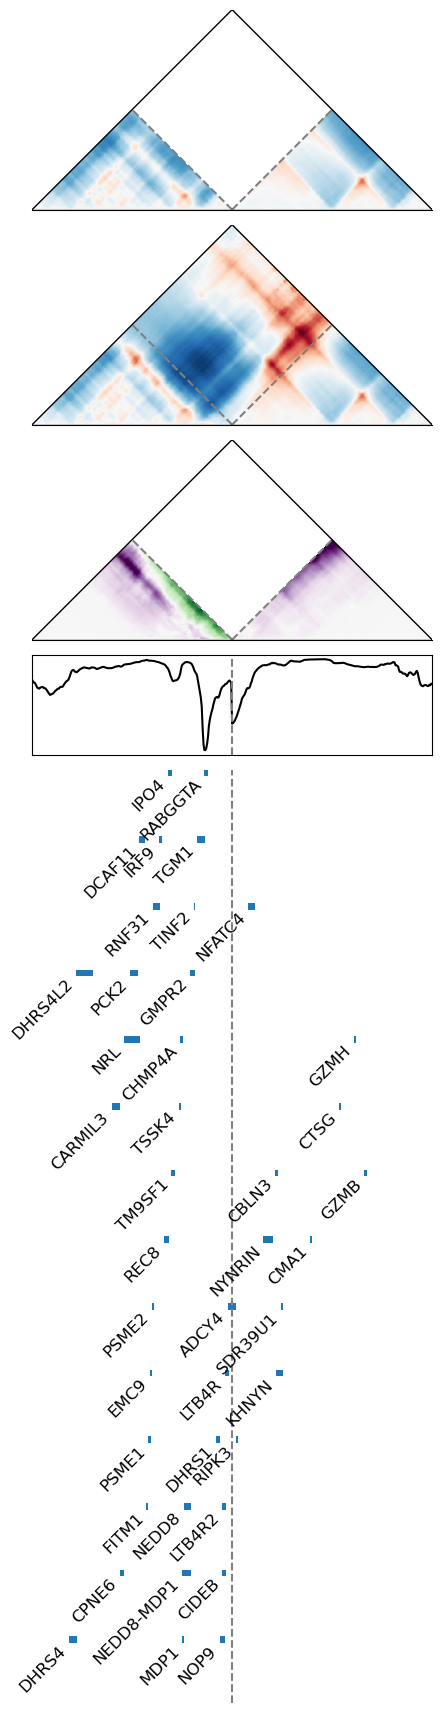

1132 INS


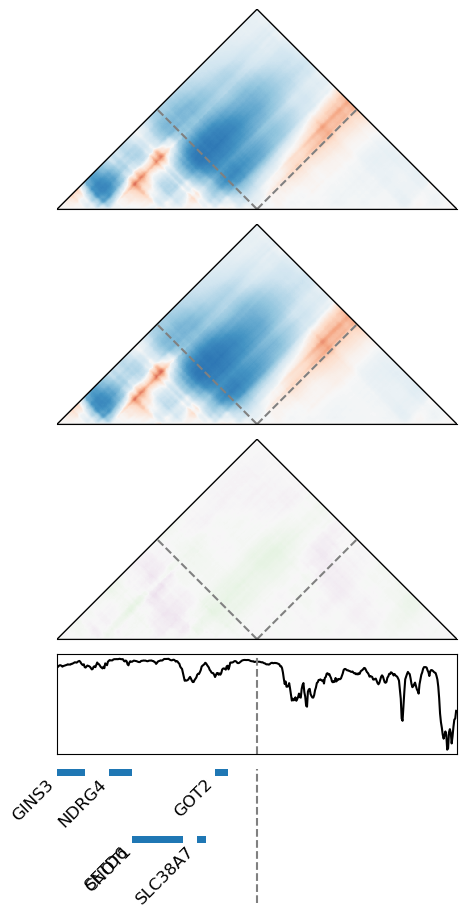

1172 INS


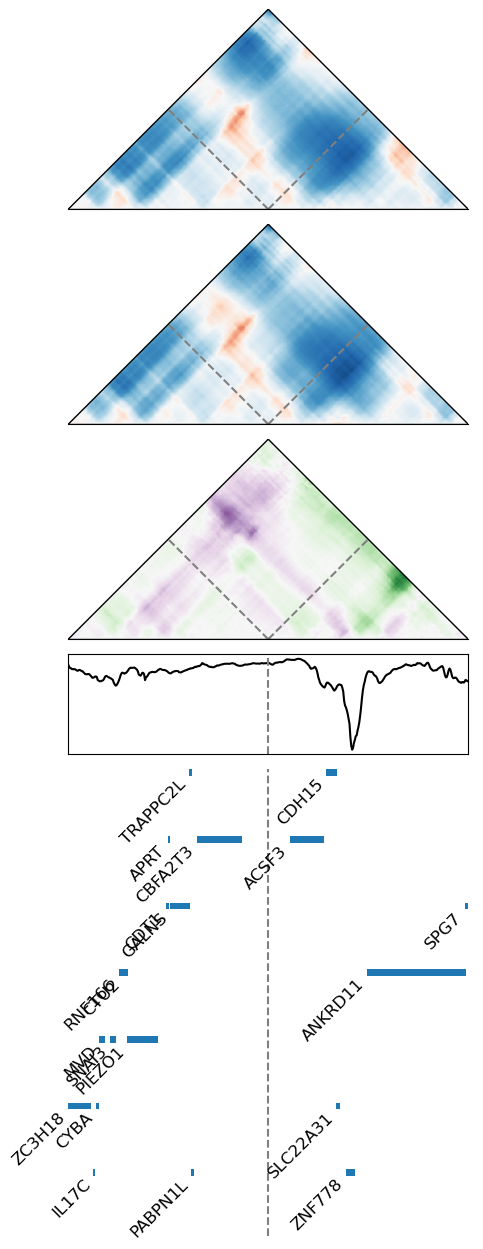

1311 BND


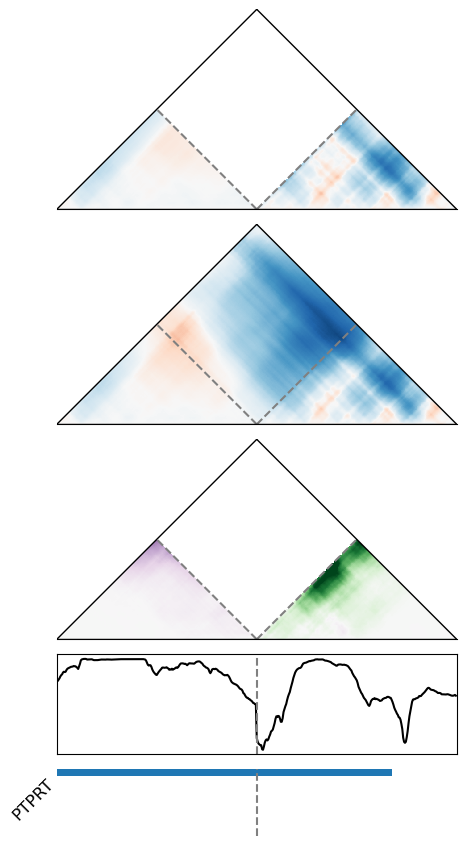

1325 DEL


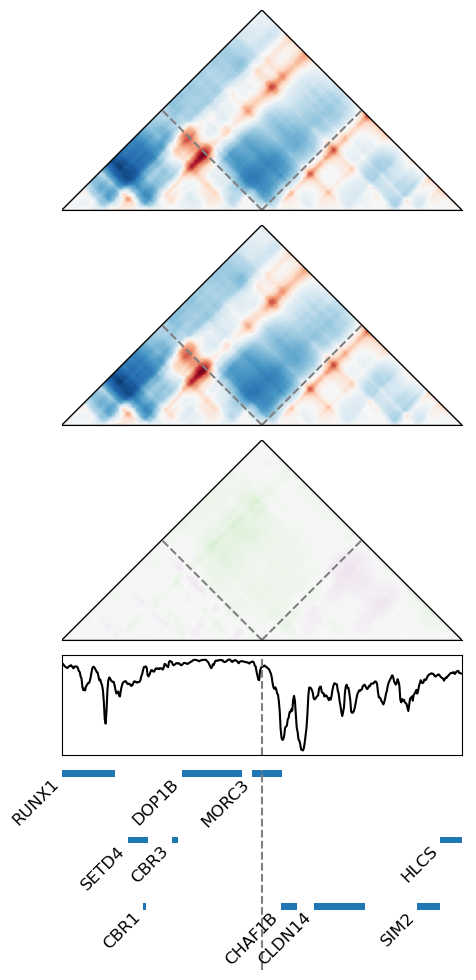

1355 DEL


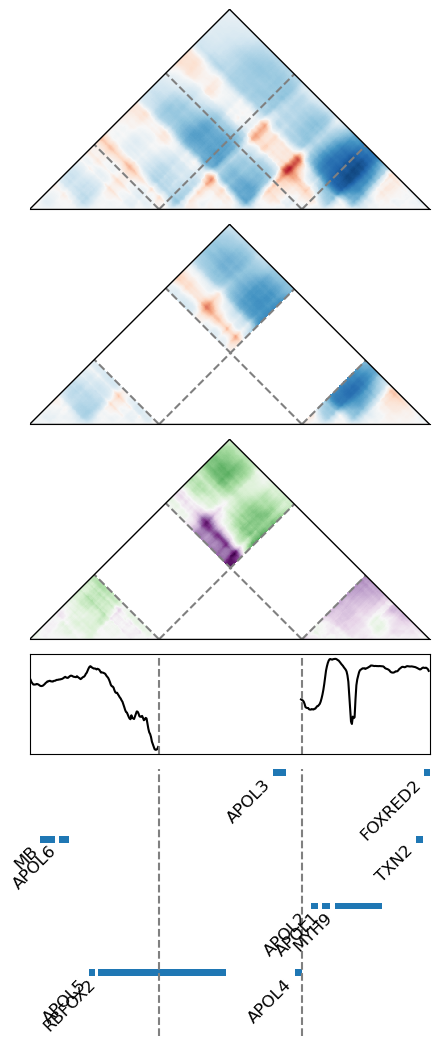

1382 INS


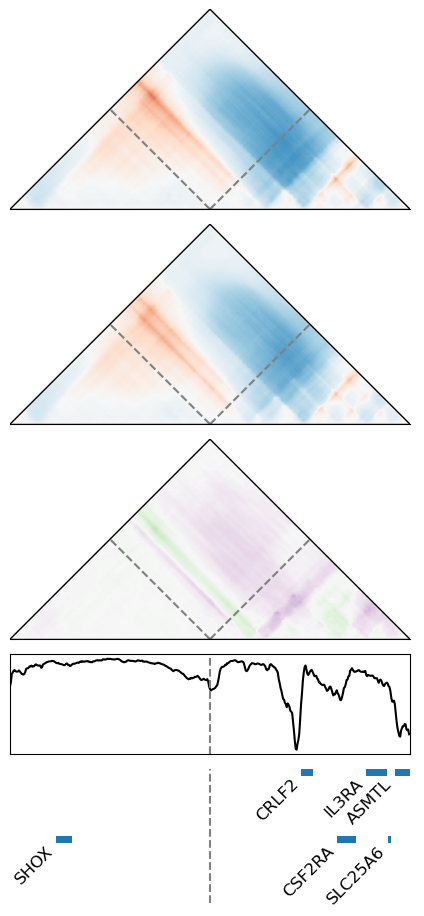

1428 DUP


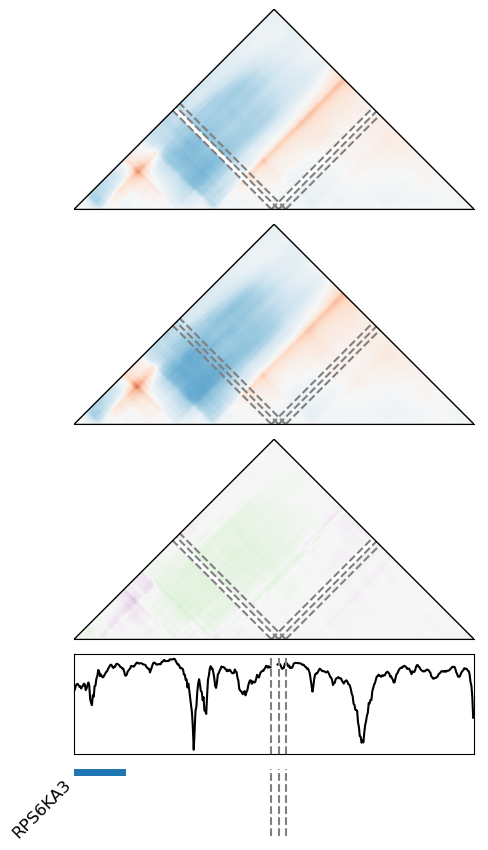

In [14]:
# Plot all maps

shift = 0
revcomp = ''
method = 'corr'

for i in range(len(variants_top)): 

    var_index = variants_top.iloc[i].var_index

    map_id = f'{i}_{shift}{revcomp}'
    track_id = f'{i}_{method}_track_{shift}{revcomp}'

    if map_id in maps.keys():
        maps_i = maps[map_id][:2]
        rel_pos_map, map_start_coord = maps[map_id][2:]
        disruption_track = tracks[track_id]

        CHR = scores_top[scores_top.var_index == var_index].CHROM.values[0]

        if 'SVLEN' in variants_top.columns:
            SVLEN = variants_top.iloc[i].SVLEN
            SVTYPE = variants_top.iloc[i].SVTYPE
        else:
            SVTYPE, SVLEN = '-', '-'

        genes_in_map = plotting_utils.get_genes_in_map(CHR, map_start_coord, rel_pos_map, SVTYPE, SVLEN)
        gene_rows = round(len(genes_in_map)/3)
        if gene_rows == 0:
            gene_rows += 1

        lines = plotting_utils.get_var_bins(rel_pos_map, SVTYPE, SVLEN)

        print(var_index, SVTYPE)
        plotting_utils.plot_maps_genes_tracks(maps_i, genes_in_map, lines, disruption_track, gene_rows = gene_rows)
        
        
        

From the maps above, thw following variants seem to result in the most interesting changes per type:

DEL: 894

DUP: 64 

BND: 1011 

INS: 439

894 DEL


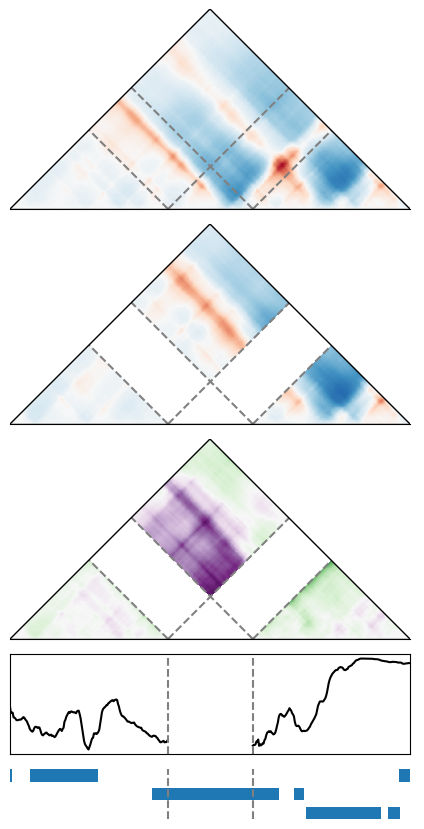

64 DUP


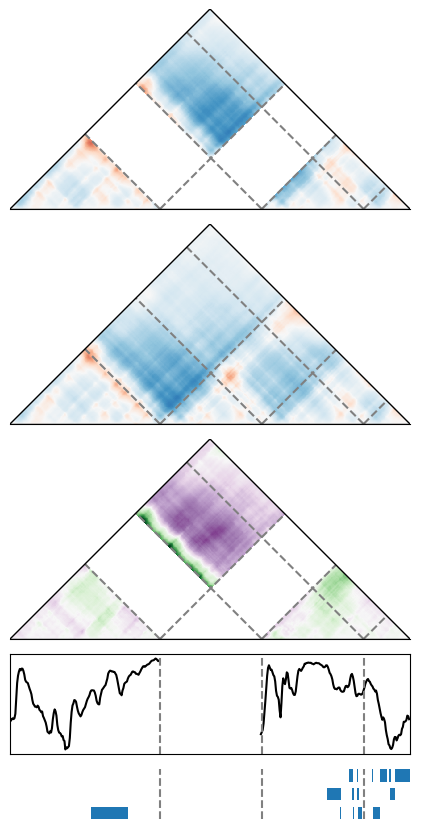

1011 BND


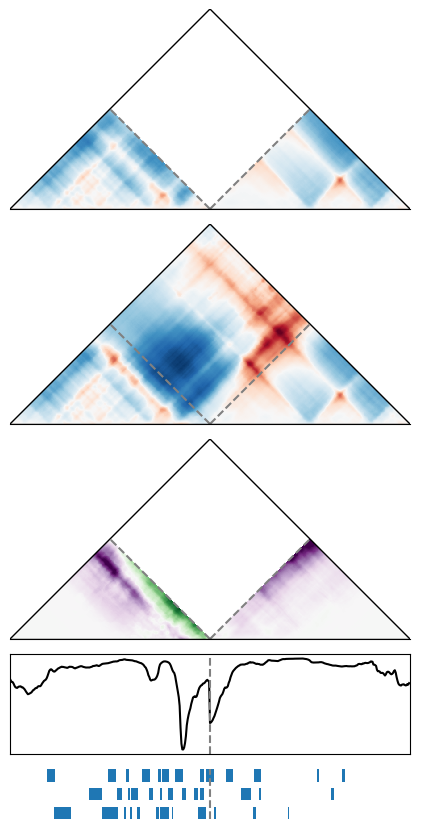

439 INS


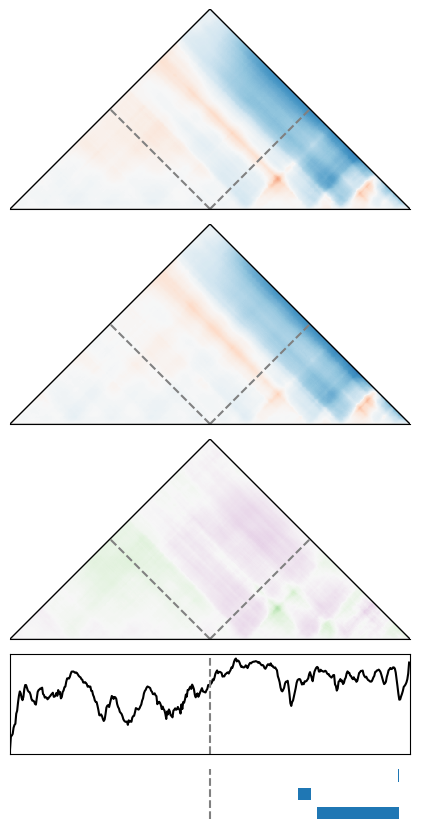

In [17]:
# Supplemental figure 

shift = 0
revcomp = ''
method = 'corr'

for ii in [894,64,1011,439]:

    # Plot maps for the top scoring variants
    i = variants_top[variants_top.var_index == ii].index[0]

    var_index = variants_top.iloc[i].var_index

    map_id = f'{i}_{shift}{revcomp}'
    track_id = f'{i}_{method}_track_{shift}{revcomp}'

    if map_id in maps.keys():
        maps_i = maps[map_id][:2]
        rel_pos_map, map_start_coord = maps[map_id][2:]
        disruption_track = tracks[track_id]

        CHR = scores_top[scores_top.var_index == var_index].CHROM.values[0]

        if 'SVLEN' in variants_top.columns:
            SVLEN = variants_top.iloc[i].SVLEN
            SVTYPE = variants_top.iloc[i].SVTYPE
        else:
            SVTYPE, SVLEN = '-', '-'

        genes_in_map = plotting_utils.get_genes_in_map(CHR, map_start_coord, rel_pos_map, SVTYPE, SVLEN)

        lines = plotting_utils.get_var_bins(rel_pos_map, SVTYPE, SVLEN)

        print(var_index, SVTYPE)
        plotting_utils.plot_maps_genes_tracks_nonames(maps_i, genes_in_map, lines, disruption_track)
        
        

894 DEL -1


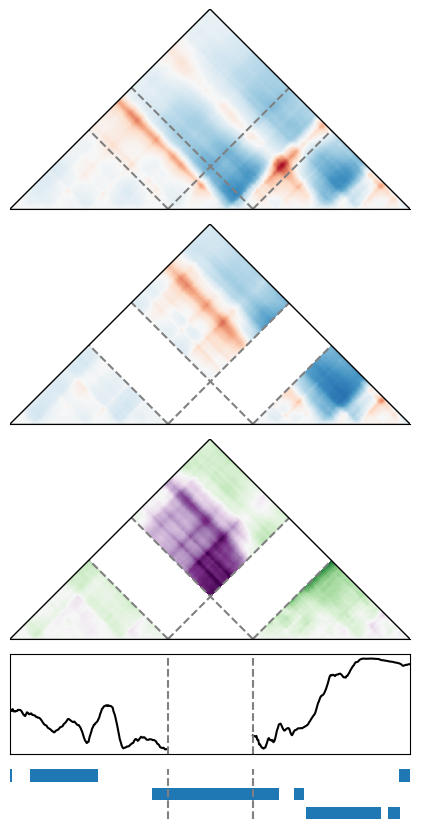

894 DEL 0


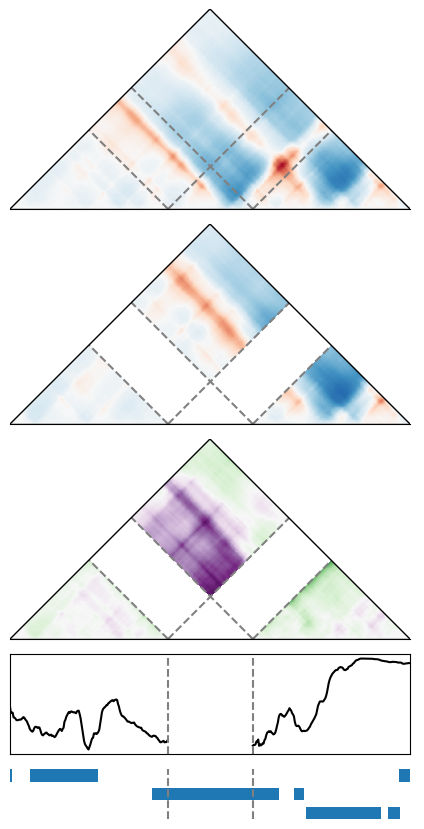

894 DEL 1


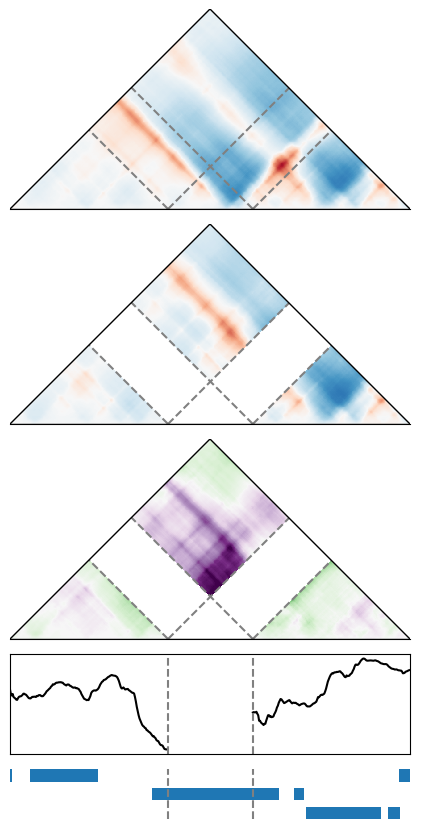

64 DUP -1


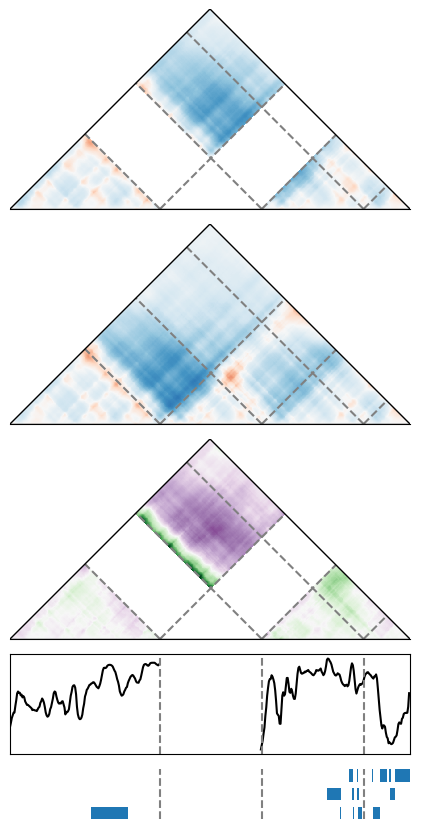

64 DUP 0


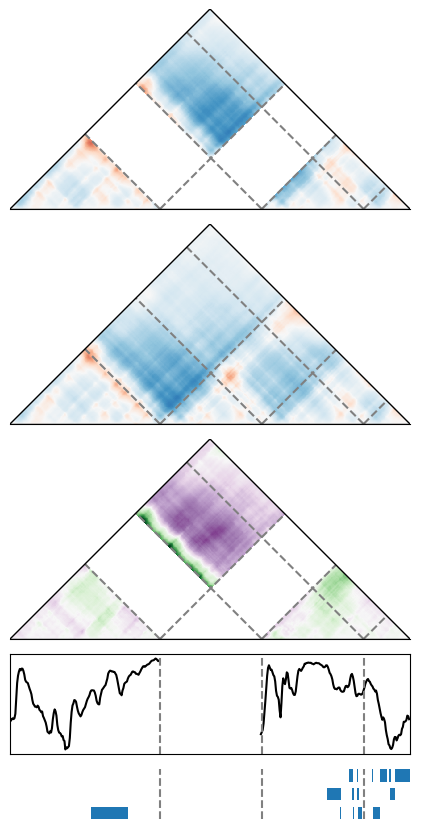

64 DUP 1


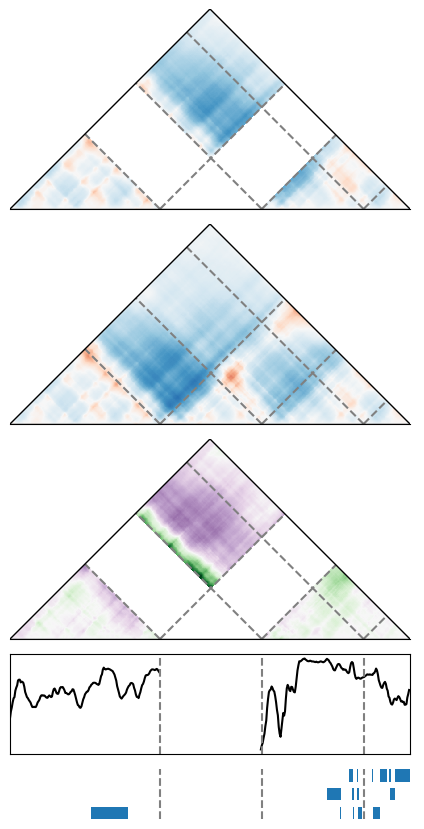

1011 BND -1


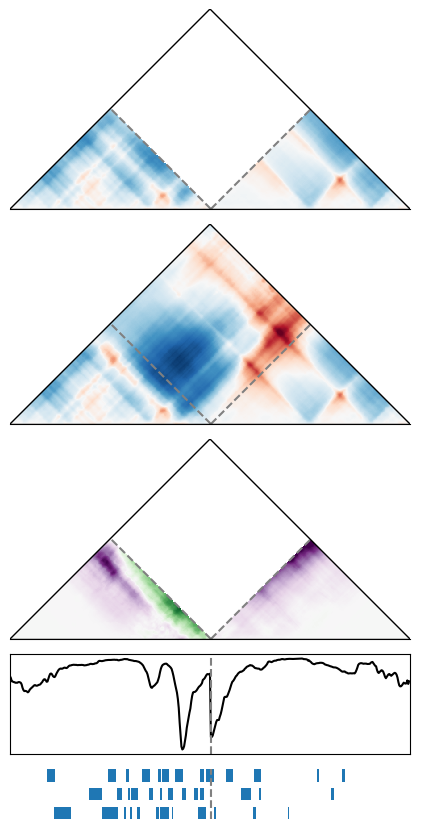

1011 BND 0


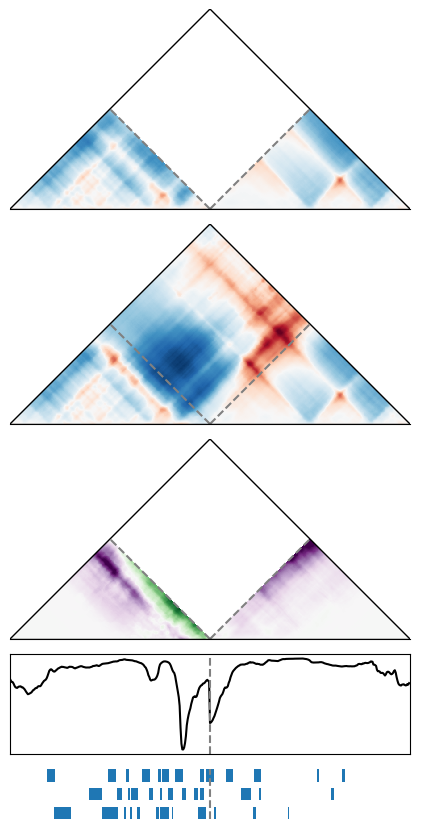

1011 BND 1


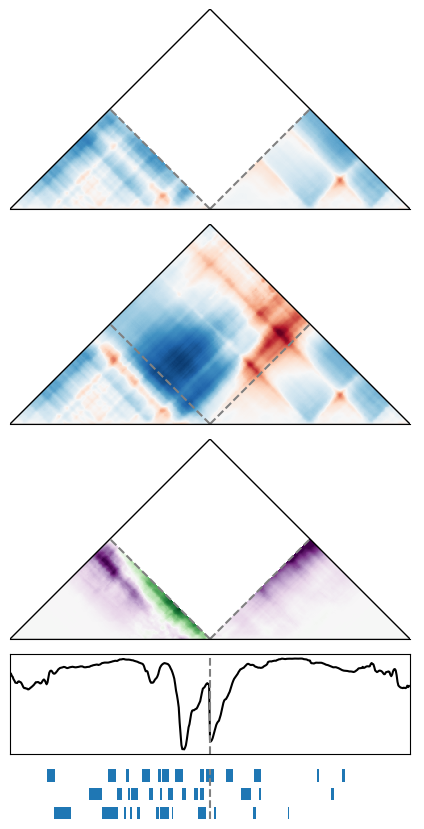

439 INS -1


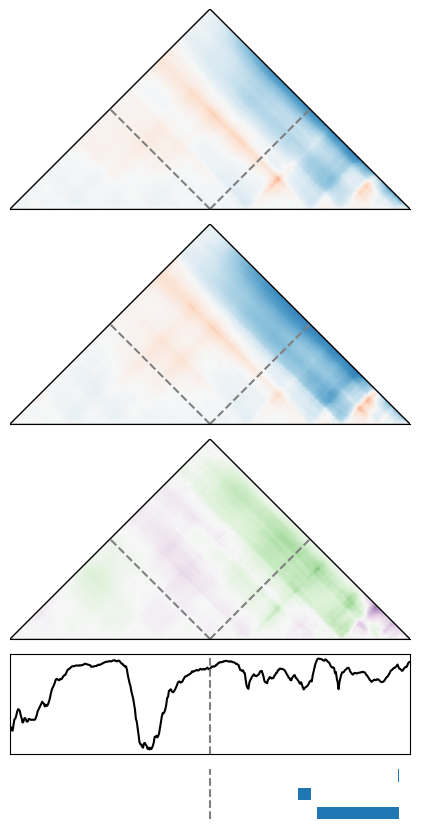

439 INS 0


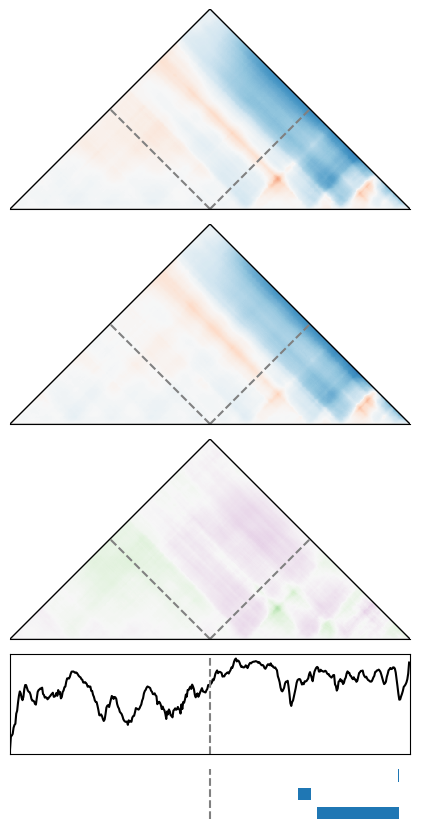

439 INS 1


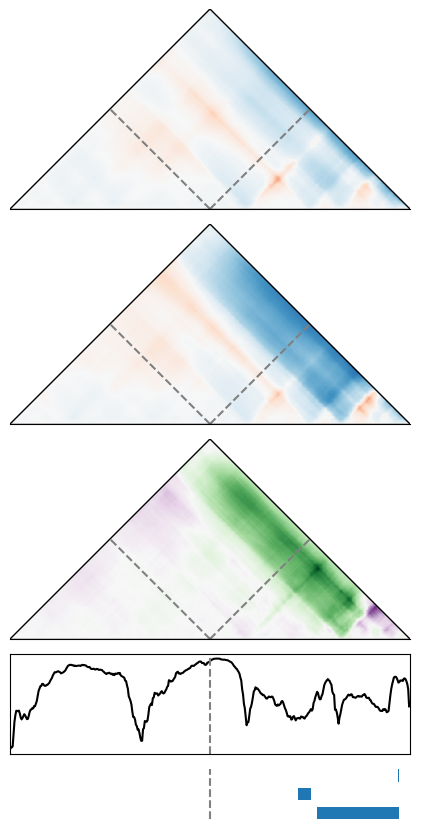

In [20]:
# Check that the shifted maps look similarly changed

# Supplemental figure 

shift = 0
revcomp = ''
method = 'corr'

for ii in [894,64,1011,439]:

    # Plot maps for the top scoring variants
    i = variants_top[variants_top.var_index == ii].index[0]

    var_index = variants_top.iloc[i].var_index

    for shift in [-1,0,1]:
        map_id = f'{i}_{shift}{revcomp}'
        track_id = f'{i}_{method}_track_{shift}{revcomp}'

        if map_id in maps.keys():
            maps_i = maps[map_id][:2]
            rel_pos_map, map_start_coord = maps[map_id][2:]
            disruption_track = tracks[track_id]

            CHR = scores_top[scores_top.var_index == var_index].CHROM.values[0]

            if 'SVLEN' in variants_top.columns:
                SVLEN = variants_top.iloc[i].SVLEN
                SVTYPE = variants_top.iloc[i].SVTYPE
            else:
                SVTYPE, SVLEN = '-', '-'

            genes_in_map = plotting_utils.get_genes_in_map(CHR, map_start_coord, rel_pos_map, SVTYPE, SVLEN)

            lines = plotting_utils.get_var_bins(rel_pos_map, SVTYPE, SVLEN)

            print(var_index, SVTYPE, shift)
            plotting_utils.plot_maps_genes_tracks_nonames(maps_i, genes_in_map, lines, disruption_track)



All SVs but the insertion show similar changes in the shifted predictions.